In [4]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import argparse


def parse_args():
    parser = argparse.ArgumentParser(description="Random Forest Training")
    parser.add_argument('--n_estimators', type=int, default=100, help='Number of trees in the forest')
    parser.add_argument('--max_depth', type=int, default=5, help='Maximum depth of the trees')
    return parser.parse_args()

args = parse_args()
mlflow.sklearn.autolog()

# Load dataset
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# Set experiment name
mlflow.set_experiment("my_experiment")

# Start a new run
with mlflow.start_run():
    # Log parameters
    n_estimators = 100
    max_depth = 5
    
    # Train model
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Log metrics
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mlflow.log_metric("rmse", rmse)
    
    # Log model
    mlflow.sklearn.log_model(model, "model")

print("Run logged to MLflow")


2024/05/13 11:22:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\crist\OneDrive - Politecnico di Milano\Polimi\Tesi\TMDP\mlflow_env\Lib\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils."


RMSE: 0.25268777396445424
Run logged to MLflow


c:\Users\crist\OneDrive - Politecnico di Milano\Polimi\Tesi\TMDP\mlflow_env\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# List all experiments
experiment = mlflow.get_experiment_by_name("my_experiment")
#for experiment in experiments:
print(experiment)

"""# List all runs for a specific experiment
experiment_id = "725823697726956658 "
runs = mlflo
print(runs)"""

<Experiment: artifact_location='file:///c:/Users/crist/OneDrive%20-%20Politecnico%20di%20Milano/Polimi/Tesi/TMDP/mlruns/725823697726956658', creation_time=1715590311209, experiment_id='725823697726956658', last_update_time=1715590311209, lifecycle_stage='active', name='my_experiment', tags={}>


'# List all runs for a specific experiment\nexperiment_id = "725823697726956658 "\nruns = mlflo\nprint(runs)'

In [ ]:
import numpy as np
from TMDP import TMDP
from River_swim import River

from algorithms import *
from model_functions import *

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import functional as F


#np.set_printoptions(precision=4)
import math
from utils import *

nS = 15
nA = 2
seed = get_current_seed()
#seed = 47146882006333120128184314011326542902
gamma = .9
mu = np.ones(nS) * 1/nS
river = River(nS, mu, small=5, large=1000, seed=seed)
tau = 1.
xi = np.ones(nS) * 1/nS
tmdp = TMDP(river, xi, tau=tau, gamma=gamma, seed=seed)
mdp = TMDP(river, xi, tau=0., gamma=gamma, seed=seed)
tmdp_1 = TMDP(river, xi, tau=.5, gamma=gamma, seed=seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Current seed for result reproducibility: 183375554099012491460556174173820478567


In [ ]:
q_c = np.zeros((nS, nA))
tmdp.update_tau(.99)
cur_res = curriculum_AC(tmdp, q_c, alpha = 0.08, alpha_pol = 0.03, episodes=1500000, 
                        batch_nS=12, temperature=5., biased=False, lam=0, 
                        epochs=1, use_delta_Q=False, final_temperature=1)


No valid pairs found
[(0.0, 0.99)]
Alpha*: 0.0 tau*: 0.99 Episode: 1079 length: 12 #teleports:1067
Time for bound evaluation:  0.19104313850402832
[(1, 0.99), (0.0, 0.9897), (1.0, 0.99)]
Alpha*: 1 tau*: 0.99 Episode: 2367 length: 12 #teleports:1276
Got not null reward 1005.0!
Time for bound evaluation:  0.0010001659393310547
[(1, 0.99), (0.0, 0.9897), (1.0, 0.98996)]
Alpha*: 1.0 tau*: 0.98996 Episode: 3478 length: 12 #teleports:1099
Time for bound evaluation:  0.001001119613647461
[(1, 0.98996), (0.0, 0.98966), (1.0, 0.98996)]
Alpha*: 1.0 tau*: 0.98996 Episode: 4688 length: 12 #teleports:1198
Time for bound evaluation:  0.0010004043579101562
[(1, 0.98996), (0.0, 0.98966), (1.0, 0.98996)]
Alpha*: 1.0 tau*: 0.98996 Episode: 6116 length: 12 #teleports:1416
Got not null reward 2000.0!
Time for bound evaluation:  0.002000570297241211
[(1, 0.98996), (0.0, 0.98966), (1.0, 0.98966)]
Alpha*: 0.0 tau*: 0.98966 Episode: 7414 length: 12 #teleports:1286
Time for bound evaluation:  0.002000570297241

KeyboardInterrupt: 

In [ ]:
print(get_softmax_policy(cur_res["thetas"][-1]))
print(cur_res["Qs"][-1])
print(get_policy(cur_res["thetas"][-1]))

[[1.00000000e+000 2.10864764e-038]
 [1.00000000e+000 6.83540902e-034]
 [1.00000000e+000 2.48184738e-030]
 [1.00000000e+000 1.39965592e-026]
 [1.00000000e+000 1.48293843e-022]
 [1.00000000e+000 1.10053522e-017]
 [5.70364786e-005 9.99942964e-001]
 [1.87243279e-036 1.00000000e+000]
 [6.67735473e-067 1.00000000e+000]
 [9.88135491e-092 1.00000000e+000]
 [6.73606405e-104 1.00000000e+000]
 [8.86669725e-108 1.00000000e+000]
 [4.91961581e-107 1.00000000e+000]
 [1.53021456e-116 1.00000000e+000]
 [3.64682814e-091 1.00000000e+000]]
[[ 49.99999984  43.2463397 ]
 [ 44.99999983  39.19061362]
 [ 40.49999982  35.59202126]
 [ 36.44999981  32.19477915]
 [ 32.80495468  28.77320159]
 [ 29.52380042  27.27716627]
 [ 26.55244355  38.2729473 ]
 [ 25.43306021  60.00726244]
 [ 38.68317799  89.24609683]
 [ 71.37170597 131.29978077]
 [107.910725   187.92069868]
 [165.21705756 265.15089083]
 [240.54195308 396.24326228]
 [405.91197414 593.64809182]
 [630.66083068 873.84438488]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [

In [ ]:
res = bellman_optimal_q(mdp.env.P_mat, mdp.env.reward, mdp.gamma)
Q = res["Q"]
print(Q)
d = compute_d_from_tau(mdp.env.mu, mdp.env.P_mat, mdp.xi, get_policy(Q), mdp.gamma, 0.)
d_curr = compute_d_from_tau(tmdp.env.mu, tmdp.P_mat_tau, tmdp.xi, get_softmax_policy(cur_res["thetas"][-1]), tmdp.gamma, 0.)
d_q = compute_d_from_tau(tmdp.env.mu, tmdp.P_mat_tau, tmdp.xi, get_policy(q_c), tmdp.gamma, 0.)

delta_pol = get_policy(Q)-get_policy(get_softmax_policy(cur_res["thetas"][-1]))
print(delta_pol)
V = compute_V_from_Q(Q, get_softmax_policy(cur_res["thetas"][-1]))
r_s_a = compute_r_s_a(mdp.env.P_mat, mdp.env.reward)

j_opt = compute_j(r_s_a, get_policy(Q), d, mdp.gamma)
j_curr = compute_j(r_s_a, get_policy(get_softmax_policy(cur_res["thetas"][-1])), d_curr, tmdp.gamma)
j_q_curr = compute_j(r_s_a, get_policy(q_c), d_q, tmdp.gamma)
j_exp = compute_expected_j(V, tmdp.env.mu)
print("optimal performance: ",j_opt)
print("expected performance: ",j_exp)
print("curriculum performance: ", j_curr)
print("Q curriculum performance: ",j_q_curr)

[[ 49.99999551  43.64999596]
 [ 44.99999596  39.73499632]
 [ 40.49999636  35.76149669]
 [ 36.44999673  32.18534702]
 [ 32.80499705  29.6973722 ]
 [ 29.52449735  32.2302746 ]
 [ 29.00724714  43.97583974]
 [ 39.57825577  64.17837661]
 [ 57.76053895  94.68232506]
 [ 85.21409256 139.91783603]
 [125.92605242 206.81776075]
 [186.13598467 305.71690659]
 [275.14521593 451.91177272]
 [406.72059545 668.01812565]
 [601.21631308 987.46769745]]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [-1.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
optimal performance:  213.31146154464213
expected performance:  213.13101772015557
curriculum performance:  213.07834470201638
Q curriculum performance:  213.07855128449287


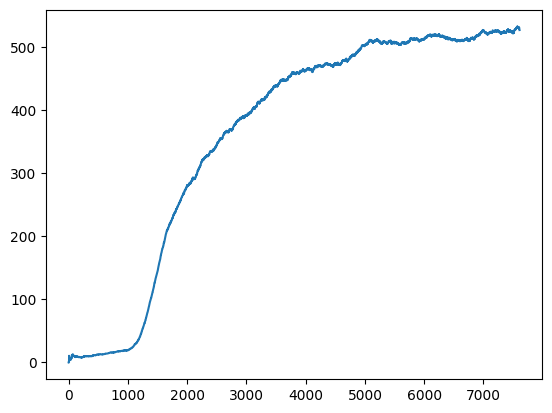

In [ ]:
import matplotlib.pyplot as plt
reward_records = cur_res["reward_records"]
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 500:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-499:idx+1]
    average_reward.append(np.average(avg_list)/12)
# Plot
#plt.plot(reward_records)
plt.plot(average_reward)